In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data=pd.read_csv('creditcard.csv')

In [4]:
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
count_classes=pd.value_counts(data['Class'],sort=True).sort_index()

Text(0, 0.5, 'Frequency')

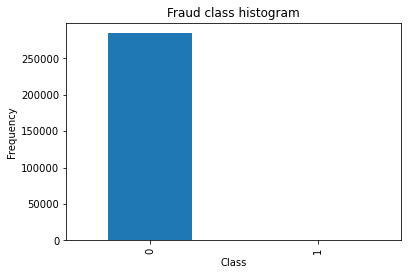

In [6]:
count_classes.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel('Frequency')

In [7]:

from sklearn.preprocessing import StandardScaler
data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Time','Amount'],axis=1)

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
# print(data.columns != 'Class')
print(data.columns)
X=data.loc[:,data.columns!='Class']
y=data.loc[:,data.columns=='Class']

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')


In [10]:
number_records_fraud=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)
normal_indices=data[data.Class==0].index
random_normal_indices=np.random.choice(normal_indices,number_records_fraud,replace=False)

In [11]:
# type(random_normal_indices)
random_normal_indices=np.array(random_normal_indices)
type(random_normal_indices) 

numpy.ndarray

In [12]:
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])

In [13]:
print(under_sample_indices)


[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  43773  44001  44091  44223  44270
  4455

In [14]:
under_sample_data=data.iloc[under_sample_indices,:]
X_undersample=under_sample_data.loc[:,under_sample_data.columns!='Class'] 
y_undersample=under_sample_data.loc[:,under_sample_data.columns=='Class']


In [15]:

print(X_undersample.head())
print(y_undersample.head())

            V1        V2        V3        V4        V5        V6        V7  \
541  -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623  -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
4920 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
6108 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6329  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   

            V8        V9       V10  ...       V20       V21       V22  \
541   1.391657 -2.770089 -2.772272  ...  0.126911  0.517232 -0.035049   
623  -0.067794 -0.270953 -0.838587  ...  2.102339  0.661696  0.435477   
4920 -0.399147 -0.238253 -1.525412  ... -0.430022 -0.294166 -0.932391   
6108 -0.248778 -0.247768 -4.801637  ... -0.171608  0.573574  0.176968   
6329 -0.496358 -1.282858 -2.447469  ...  0.009061 -0.379068 -0.704181   

           V23       V24       V25       V26       V27       V28  normAmount  
541  -0.46521

In [16]:
#showing ratio
print('Percentage of normal transaction:',len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data))
print('Percentage of fraud transactions:',len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))
print('Total number of transactions in resampled data:',len(under_sample_data))

Percentage of normal transaction: 0.5
Percentage of fraud transactions: 0.5
Total number of transactions in resampled data: 984


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample=train_test_split(
    X_undersample,
    y_undersample,
    test_size=0.3,
    random_state=0
)


In [18]:
print('Number transactions train dataset:',len(X_train))
print('Number transactions test dataset:',len(X_test))
print('Total number of transactions:',len(X_train)+len(X_test ))
print("")

print('Number transactions train dataset: ',len(X_train_undersample))
print('Number transactions test dataset: ',len(X_test_undersample))
print('Total number of transactions',len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset: 199364
Number transactions test dataset: 85443
Total number of transactions: 284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions 984


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [28]:

def printing_Kfold_scores(x_train_data,y_train_data):
    fold=KFold(len(y_train_data),5,shuffle=False)
    # Different C parameters 
    c_param_range=[0.01,0.1,1,10,100]
    results_table=pd.DataFrame(index=range(2,shuffle=False),columns=['C_parameter','Mean recall score'])
    results_table['C_parameter']=c_param_range
    # the k-fold will give 2 lists train_indices=indices[0],test_indices=indices[1]
    j=0
    for c_param in c_param_range:
        print('-'*50)
        print('C parameter:',c_param)
        print('-'*50)
        print('')
        recall_accs=[]
        for iteration,indices in enumerate(fold,start=1):
            #call the logistic regression model with a certain C parameter 
            lr=LogisticRegression(C=c_param,penalty='ll')
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_undersample=lr.predict(x_train_data.iloc[indices[1],:].values)
            recall_acc=recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration  ',iteration,': recall score =',recall_acc)
        results_table.ix[j:'Mean recall score ']=np.mean(recall_accs)
        j+=1
        print('')
        print('Mean recall score' ,np.mean(recall_accs))
        print('')
    best_c=results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    print('*'*100)
    print('Best model to choose from cross validation is with C parameter =',best_c)
    print('*'*100)
    return best_c

In [29]:
best_c=printing_Kfold_scores(X_train_undersample,y_train_undersample)



d:\ai\workspace\py_stu\venv\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass shuffle=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


TypeError: shuffle must be True or False; got 5